

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [132]:
from IPython.display import IFrame # import iFrame
google_sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&gid=1#gid=1" #assign the link to a variable
IFrame(src=google_sheet_url, width=800, height=400) # Display the Google Sheet using an iframe


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [133]:
#a
#first download the tab "Total casualties" as a csv file from our embedded google spreadsheet. File -> Download
import pandas as pd # then import pandas to be able to read it 
f = 'data/Wikileaks Afghanistan war logs analysis - TOTAL CASUALTIES, ALL CAUSES.csv' # assign the file location to a variable
db = pd.read_csv(f)    # Read the table in
db.head()

,"Casualties detailed in the war logs, month by month",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
1,2004,January,15,51,23,NaN,11
2,2004,February,NaN,7,4,5,2
3,2004,March,19,2,NaN,2,3
4,2004,April,5,3,19,NaN,3


In [134]:
#to get rid of the weird column names and use the first row as our column names we do the following
db.columns = db. iloc[0] # make the first row the header
db = db.drop(db.index[0]) # delete the first row as it was the header
db = db.reset_index(drop=True) #reset the index so it starts with 0

#b
db.head() #display the first 5 rows

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
0,2004,January,15,51,23,NaN,11
1,2004,February,NaN,7,4,5,2
2,2004,March,19,2,NaN,2,3
3,2004,April,5,3,19,NaN,3
4,2004,May,18,29,56,6,9


In [135]:
#c
keys = db.columns.tolist() # use the column headers as keys
values = db.iloc[0].tolist() # use the first row as values

dictonary = dict(zip(keys, values)) #connect keys and values

print(dictonary) #print the dictonary

{'Year': '2004', 'Month': 'January', 'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': '11'}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

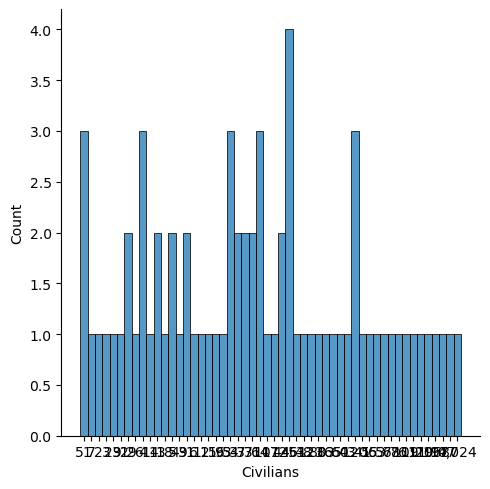

In [136]:
import seaborn as sns #import seaborn to be able to plot charts 

#a
_ = sns.displot(db['Civilians'], kde=False) #plot the count of civilians per month

In [137]:
db.info() # to check which datatype we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            72 non-null     object
 1   Month                           73 non-null     object
 2   Taliban                         72 non-null     object
 3   Civilians                       73 non-null     object
 4   Afghan forces                   71 non-null     object
 5   Nato (detailed in spreadsheet)  67 non-null     object
 6   Nato - official figures         72 non-null     object
dtypes: object(7)
memory usage: 4.1+ KB


In [138]:
db['Afghan forces'] = db['Afghan forces'].str.replace(',','').astype(float) # we removed the commas of the numbers higher than 1000 with the following code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     object 
 1   Month                           73 non-null     object 
 2   Taliban                         72 non-null     object 
 3   Civilians                       73 non-null     object 
 4   Afghan forces                   71 non-null     float64
 5   Nato (detailed in spreadsheet)  67 non-null     object 
 6   Nato - official figures         72 non-null     object 
dtypes: float64(1), object(6)
memory usage: 4.1+ KB


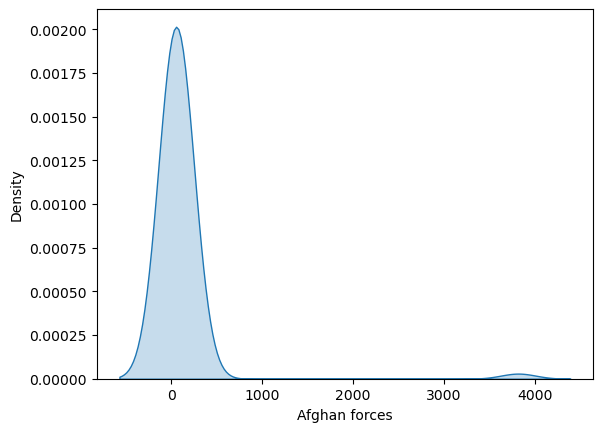

In [139]:
db['Afghan forces'] = pd.to_numeric(db['Afghan forces']) # change the datatype of Taliban to float to be able to visualise it
db.info() # check the datatype
_ = sns.kdeplot(db['Afghan forces'], fill=True) # plot a kde 
# the message of the plot is not that practical as it shows that most casualties per month are at around 0, 
# and then there is little data which is way higher (the sum of all the months). 
# But the point of the exercise it to do make a KDE plot and that is done.

In [140]:
# 3c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.
# we skip this exercise for now and will do it at last

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [141]:
#a

db['Civilians'] = db['Civilians'].str.replace(',','').astype(float) # to get rid of the comma

df = pd.DataFrame(db) # to create a drataframe

for value in df['Civilians']:
    print(value) #loops through the column of Cilvilians and prints each value

51.0
7.0
2.0
3.0
29.0
32.0
19.0
26.0
4.0
14.0
19.0
13.0
4.0
4.0
18.0
5.0
49.0
31.0
5.0
6.0
12.0
15.0
13.0
16.0
93.0
54.0
37.0
33.0
54.0
71.0
64.0
101.0
172.0
44.0
46.0
51.0
53.0
33.0
48.0
123.0
71.0
80.0
83.0
65.0
64.0
46.0
60.0
37.0
43.0
120.0
41.0
55.0
54.0
51.0
120.0
46.0
63.0
56.0
78.0
76.0
31.0
46.0
64.0
44.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0
4024.0


In [142]:
#b

filtered_df = df[df['Civilians']>50] # to find out when the there were more than 50 civilian casualties per month we filtered the dataframe 

for value in filtered_df['Civilians']:
    print(value) # to print the value of all the months were there were more than 50 civilian casualties

51.0
93.0
54.0
54.0
71.0
64.0
101.0
172.0
51.0
53.0
123.0
71.0
80.0
83.0
65.0
64.0
60.0
120.0
55.0
54.0
51.0
120.0
63.0
56.0
78.0
76.0
64.0
109.0
111.0
119.0
206.0
197.0
107.0
120.0
87.0
4024.0


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [143]:
# a 
list = ["Civilians", "Afghan forces"] #to create a list with the two string "Civilians" and "Afghan forces"

#b
df2 = df[list + ["Month","Year"]] # create a new dataframe which only includes the needed values "Civilians", "Afghan forces", "Month" and "Year".

df2.head() # to check if it worked

,Civilians,Afghan forces,Month,Year
0,51.0,23.0,January,2004
1,7.0,4.0,February,2004
2,2.0,NaN,March,2004
3,3.0,19.0,April,2004
4,29.0,56.0,May,2004


In [144]:
#c
db['Month'] = db['Month'].astype(str) #to be able to link casualties with the specific month we create a column which tells us the month as well as the year
db['Year'] = db['Year'].astype(str) #to do so we first need to convert them to strings

db['Month_Year']=db['Month']+' '+db['Year'] # create a new variable
db['casualties']=db['Civilians']+db['Afghan forces'] # create a variable which includes the casualties of Civilians and Afghan forces
db.head() # check if the variable is created the way it was intended

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Month_Year,casualties
0,2004,January,15,51.0,23.0,NaN,11,January 2004,74.0
1,2004,February,NaN,7.0,4.0,5,2,February 2004,11.0
2,2004,March,19,2.0,NaN,2,3,March 2004,NaN
3,2004,April,5,3.0,19.0,NaN,3,April 2004,22.0
4,2004,May,18,29.0,56.0,6,9,May 2004,85.0


<Axes: xlabel='Month_Year', ylabel='casualties'>

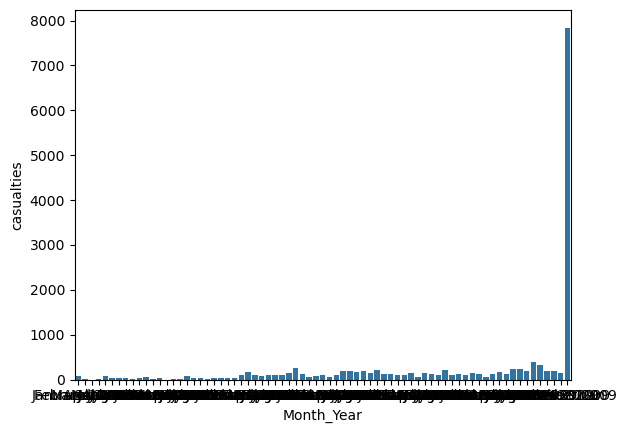

In [145]:
sns.barplot(x='Month_Year',y='casualties',data=db) # do a bar plot

<Axes: xlabel='Month_Year', ylabel='casualties'>

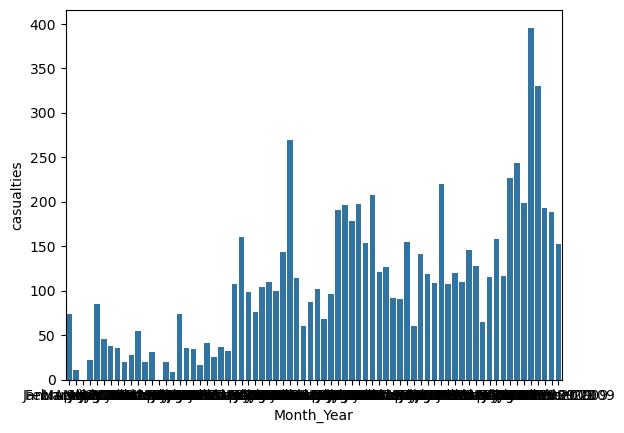

In [146]:
#to get a more meaningful plot the last row which is the sum should be dropped
db_without_sum = db.drop(db.index[-1]) # to drop the last row

sns.barplot(x='Month_Year',y='casualties',data=db_without_sum) #redo the bar plot without the sum in the end

<Axes: xlabel='Month_Year', ylabel='casualties'>

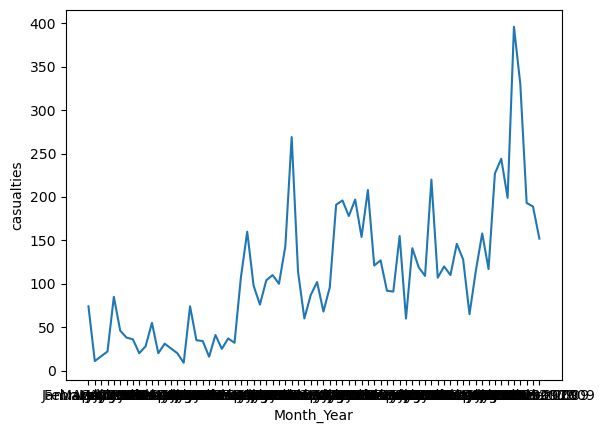

In [147]:
sns.lineplot(x='Month_Year',y='casualties',data=db_without_sum) #do the same as above, just as a lineplot

In [148]:
# 3c)  Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

db_without_sum.info() # to get an overview of our variables and their data types
db_without_sum.head() # to get an idea on how the table looks like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            72 non-null     object 
 1   Month                           72 non-null     object 
 2   Taliban                         71 non-null     object 
 3   Civilians                       72 non-null     float64
 4   Afghan forces                   70 non-null     float64
 5   Nato (detailed in spreadsheet)  66 non-null     object 
 6   Nato - official figures         72 non-null     object 
 7   Month_Year                      72 non-null     object 
 8   casualties                      70 non-null     float64
dtypes: float64(3), object(6)
memory usage: 5.2+ KB


,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Month_Year,casualties
0,2004,January,15,51.0,23.0,NaN,11,January 2004,74.0
1,2004,February,NaN,7.0,4.0,5,2,February 2004,11.0
2,2004,March,19,2.0,NaN,2,3,March 2004,NaN
3,2004,April,5,3.0,19.0,NaN,3,April 2004,22.0
4,2004,May,18,29.0,56.0,6,9,May 2004,85.0


In [149]:
db_without_sum['Month_Year'] = db_without_sum['Month_Year'].astype('category') # change the data type of the column Month_Year to categorical v. 
db_without_sum.info() # to check if it worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Year                            72 non-null     object  
 1   Month                           72 non-null     object  
 2   Taliban                         71 non-null     object  
 3   Civilians                       72 non-null     float64 
 4   Afghan forces                   70 non-null     float64 
 5   Nato (detailed in spreadsheet)  66 non-null     object  
 6   Nato - official figures         72 non-null     object  
 7   Month_Year                      72 non-null     category
 8   casualties                      70 non-null     float64 
dtypes: category(1), float64(3), object(5)
memory usage: 7.3+ KB


<Axes: xlabel='Month_Year', ylabel='Civilians'>

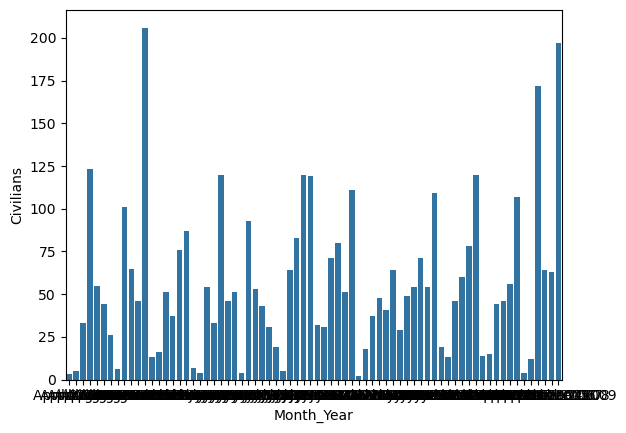

In [150]:
sns.barplot(x='Month_Year', y='Civilians', data=db_without_sum) # to create a vertical bar plot of the number of civilian casualties per month

<Axes: xlabel='Civilians', ylabel='Month_Year'>

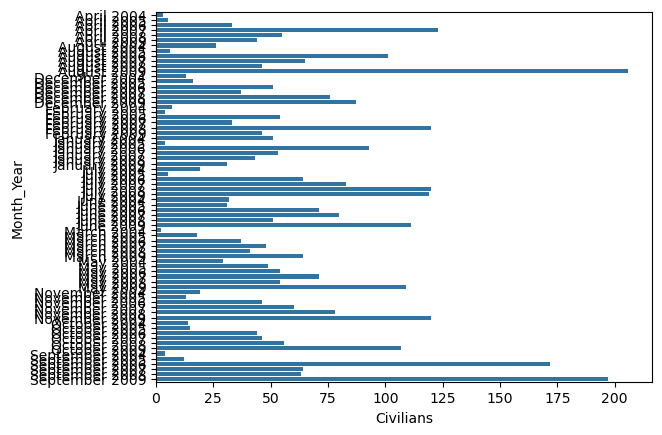

In [151]:
sns.barplot(x='Civilians', y='Month_Year', data=db_without_sum) # to plot horizontally we changed the x and the y input
# by doing that it becomes easier to see which bar is related to which Month